PROJECT PREVIEW
---
Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crimes reported in the city. Being effective involves knowing crime patterns and where they are likely to occur. It also involves equipping the Police Department appropriately. They have recruited you to conduct full data analytics and predictive modeling to uncover insights from the data that can be used to effectively mobilize and respond to crimes in shorter time cycles. They are interested in gleaning any insights that can help them determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes

Steps to take
---
First  I will need to wrangle my dataset to get the insight of the problem am suppose to help find its solution
This involves getting the data set on to the jupyter notebook then cleaning and proscessing it then later continue with the help of algorithms.

In [1]:
"""Importing all the necessary libraries to use"""
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import seaborn as sb
from pandas import set_option
from sklearn.feature_selection  import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [2]:
data = pd.read_csv("./crime_data_Proj1.csv")

In [3]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,6407111,11398199,5488785,11389116,12420431
Case Number,HP485721,JB372830,HN308568,JB361368,JE297624
Date,07/26/2008 02:30:00 PM,07/31/2018 10:57:00 AM,04/27/2007 10:30:00 AM,07/23/2018 08:55:00 AM,07/11/2021 06:40:00 AM
Block,085XX S MUSKEGON AVE,092XX S ELLIS AVE,062XX N TRIPP AVE,0000X N KEELER AVE,016XX W HARRISON ST
IUCR,1320,143C,0610,0560,051A
Primary Type,CRIMINAL DAMAGE,WEAPONS VIOLATION,BURGLARY,ASSAULT,ASSAULT
Description,TO VEHICLE,UNLAWFUL POSS AMMUNITION,FORCIBLE ENTRY,SIMPLE,AGGRAVATED - HANDGUN
Location Description,STREET,POOL ROOM,RESIDENCE,NURSING HOME/RETIREMENT HOME,PARKING LOT / GARAGE (NON RESIDENTIAL)
Arrest,False,True,True,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [5]:
"""renaming features with space by adding an underscore for ease of access"""
data.rename({'Case Number':'Case_Number','Primary Type':'Primary_Type', 'Location Description':'Location_Description','Community Area':'Community_Area','FBI Code':'FBI_Code','Updated On':'Update_On'}, axis = "columns", inplace = True)

In [6]:
"""Adding features to the data set to make it more elaborate"""
tCol = data.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<5:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

data['month'] = monthList
data['day'] = dayList
data['period']= periodList
data.head().T


2278726 2278726 2278726


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,6407111,11398199,5488785,11389116,12420431
Case_Number,HP485721,JB372830,HN308568,JB361368,JE297624
Date,07/26/2008 02:30:00 PM,07/31/2018 10:57:00 AM,04/27/2007 10:30:00 AM,07/23/2018 08:55:00 AM,07/11/2021 06:40:00 AM
Block,085XX S MUSKEGON AVE,092XX S ELLIS AVE,062XX N TRIPP AVE,0000X N KEELER AVE,016XX W HARRISON ST
IUCR,1320,143C,0610,0560,051A
Primary_Type,CRIMINAL DAMAGE,WEAPONS VIOLATION,BURGLARY,ASSAULT,ASSAULT
Description,TO VEHICLE,UNLAWFUL POSS AMMUNITION,FORCIBLE ENTRY,SIMPLE,AGGRAVATED - HANDGUN
Location_Description,STREET,POOL ROOM,RESIDENCE,NURSING HOME/RETIREMENT HOME,PARKING LOT / GARAGE (NON RESIDENTIAL)
Arrest,False,True,True,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case_Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary_Type          object 
 7   Description           object 
 8   Location_Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community_Area        float64
 15  FBI_Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Update_On             object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
 23  month  

In [8]:
"""checking for missing data in the dataset"""
data.isna().sum()

Unnamed: 0                   0
ID                           0
Case_Number                  1
Date                         0
Block                        0
IUCR                         0
Primary_Type                 0
Description                  0
Location_Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community_Area          184267
FBI_Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Update_On                    0
Latitude                 23985
Longitude                23985
Location                 23985
month                        0
day                          0
period                       0
dtype: int64

In [9]:
"""checking the percentage of missing data per feature then decide on whether
to drop the feature or not"""

(data.isna().sum() /len(data)) * 100

Unnamed: 0              0.000000
ID                      0.000000
Case_Number             0.000044
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary_Type            0.000000
Description             0.000000
Location_Description    0.126255
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000527
Ward                    8.105187
Community_Area          8.086404
FBI_Code                0.000000
X Coordinate            1.052562
Y Coordinate            1.052562
Year                    0.000000
Update_On               0.000000
Latitude                1.052562
Longitude               1.052562
Location                1.052562
month                   0.000000
day                     0.000000
period                  0.000000
dtype: float64

In [10]:
"""conducting data cleaning per feature with the missing data """
"""check for duplicates"""
print(data.duplicated().sum())

0


In [11]:
"""Dropping location feature since we have longitude and latitude in the correct datatype representing location"""
data = data.drop(columns = ["Location", "Case_Number", "Unnamed: 0"])

In [12]:
"""Using mode to clean the Location Description
Ward, Community Area, District and Location this helps identify where the crimes were common"""
print(data['Location_Description'].mode()[0])
data['Location_Description'].fillna('STREET',inplace=True)

print(data['Ward'].mode()[0])
data['Ward'].fillna(28.0, inplace=True)

print(data['Community_Area'].mode()[0])
data['Community_Area'].fillna(25.0, inplace=True)

print(data['District'].mode()[0])
data['District'].fillna(8.0, inplace=True)

STREET
28.0
25.0
8.0


In [13]:
data.shape

(2278726, 23)

In [14]:
"""dropping the missing data on longitude, latitude, X and Y coordinates being location data"""
data.dropna(inplace=True)

In [15]:
data.isna().sum()

ID                      0
Date                    0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community_Area          0
FBI_Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Update_On               0
Latitude                0
Longitude               0
month                   0
day                     0
period                  0
dtype: int64

In [16]:
data.select_dtypes('object').head()

,Date,Block,IUCR,Primary_Type,Description,Location_Description,FBI_Code,Update_On,month,day,period
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,14,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,15,08/07/2018 04:02:59 PM,Jul,Tue,Morning
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,05,02/28/2018 03:56:25 PM,Apr,Fri,Morning
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,08A,07/30/2018 03:52:24 PM,Jul,Mon,Morning
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),04A,07/18/2021 04:56:02 PM,Jul,Sun,Morning


In [17]:
data.select_dtypes('bool').head()

,Arrest,Domestic
0,False,False
1,True,False
2,True,False
3,False,False
4,False,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254741 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary_Type          object 
 5   Description           object 
 6   Location_Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community_Area        float64
 13  FBI_Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Update_On             object 
 18  Latitude              float64
 19  Longitude             float64
 20  month                 object 
 21  day                   object 
 22  period                object 
dtypes: bool

In [19]:
"""converting non-numerical data to numerical first checking the labels on the categorical data"""
print(set(data.Arrest))
print(set(data.Domestic))
print(set(data.Block))
print(set(data.IUCR))
print(set(data.Description))
print(set(data.Primary_Type))
print(set(data.Location_Description))
print(set(data.FBI_Code))
print(set(data.month))
print(set(data.day))
print(set(data.period))

{False, True}
{False, True}
{'052XX N SHERIDAN RD', '032XX W BEACH AVE', '025XX N BOSWORTH AVE', '041XX W OGDEN AVE', '013XX E 53RD ST', '036XX W GRAND AV', '020XX W RICE ST', '070XX S CORNELL AV', '063XX W CORNELIA AV', '002XX E SUPERIOR ST', '077XX S COLFAX AVE', '082XX S SACRAMENTO AVE', '036XX N AVERS AV', '084XX S KILBOURN AVE', '031XX W PETERSON AV', '014XX S ROCKWELL ST', '037XX S LOOMIS PL', '114XX S MORGAN ST', '011XX S MONITOR AV', '055XX W MADISON ST', '102XX W ZEMKE RD', '103XX S COTTAGE GROVE AVE', '111XX S HALSTED ST', '034XX N CENTRAL PARK AVE', '036XX W 57TH ST', '029XX W 40TH PL', '030XX W WARREN BLVD', '017XX W BERTEAU AVE', '020XX W WALTON ST', '106XX S LANGLEY AVE', '083XX S STEWART AVE', '063XX N NOKOMIS AVE', '049XX S ROCKWELL ST', '056XX S LAFLIN ST', '006XX E 44TH ST', '049XX S MAPLEWOOD AVE', '016XX S SACRAMENTO DR', '056XX W WELLINGTON AV', '040XX W WRIGHTWOOD AV', '036XX N SHEFFIELD AV', '038XX W HARRISON ST', '026XX W 60TH ST', '022XX W FARWELL AV', '043XX S

{'PUBLIC PEACE VIOLATION', 'OBSCENITY', 'STALKING', 'PUBLIC INDECENCY', 'BURGLARY', 'INTERFERENCE WITH PUBLIC OFFICER', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL', 'ARSON', 'PROSTITUTION', 'ASSAULT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'BATTERY', 'MOTOR VEHICLE THEFT', 'OTHER NARCOTIC VIOLATION', 'SEX OFFENSE', 'THEFT', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'GAMBLING', 'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION', 'KIDNAPPING', 'CRIMINAL SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN', 'NON - CRIMINAL', 'RITUALISM', 'HOMICIDE', 'HUMAN TRAFFICKING', 'OTHER OFFENSE'}
{'SCHOOL - PUBLIC BUILDING', 'RESIDENCE - GARAGE', 'OTHER COMMERCIAL TRANSPORTATION', 'ABANDONED BUILDING', 'MOVIE HOUSE/THEATER', 'GANGWAY', 'AIRPORT VENDING ESTABLISHMENT', 'RESIDENCE-GARAGE', 'SIDEWALK', 'RETAIL STORE', 'ALLEY', 'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'HOUSE', 'AIRPORT TRANSPORTATION SYSTEM (ATS)', 'FACTORY / MA

In [20]:
"""Transfoming non-numerical data to numerical using label encoder"""
le = LabelEncoder()
data.Arrest = le.fit_transform(data.Arrest)
data.Domestic = le.fit_transform(data.Domestic)
data.Block = le.fit_transform(data.Block)
data.IUCR = le.fit_transform(data.IUCR)

data.Description = le.fit_transform(data.Description)
data.Primary_Type = le.fit_transform(data.Primary_Type)
data.Location_Description = le.fit_transform(data.Location_Description)
data.FBI_Code = le.fit_transform(data.FBI_Code)
data.month = le.fit_transform(data.month)
data.day = le.fit_transform(data.day)
data.period = le.fit_transform(data.period)

In [21]:
print(data['Arrest'].unique())
print(data['Domestic'].unique())
print(data['Block'].unique())
print(data['IUCR'].unique())
print(data['Description'].unique())
print(data['Primary_Type'].unique())
print(data['Location_Description'].unique())
print(data['FBI_Code'].unique())
print(data['month'].unique())
print(data['day'].unique())
print(data['period'].unique())

[0 1]
[0 1]
[47963 49157 40541 ... 10842 19014  7956]
[156 174  83  77  63  87  19 251 101 262  51  84 308 185 123  88 275  39
 109 166 125  97 130 122 335 155  99  32 179 272  17  29 305 325 157  86
  31  91 306 270  95 271  78  90 247 168  67 361  59  65  42 205  13 326
 375 128  98 292 154 347 172  49 293  66  58 132 190 161  85 289 162  21
 142 291 245 160 265   0 290 105 163 370 374 143 253 303 254 276 359 243
  48 103 210  80  16  20   3  22 141 307 206  38  53 252 131 237 218  92
 274  71   5  15 311 260 351  28 372 138  26 323 298 312  33 150 345  25
  37 137 121 173 145 342 189 133  72  61  60 250  44 129 340  79 248 114
 102 380 269 365 115 360 381 249 301 232 120 110 241 330  18 184 318 350
 310  94 353 299  52 100  23 165 300   6 346 236 316  68 259  24  14 181
 134 199 152 295  30 338 148  55   7 124 139  93 159 203 352 177 167 273
  50 244  76 321 288 356 277   8 309  36 344 164 256  70 348  73  54 314
 336 246 216 127  57 371 201  40  96 261 182 215 107 332 192  64 158 2

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254741 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Block                 int64  
 3   IUCR                  int64  
 4   Primary_Type          int64  
 5   Description           int64  
 6   Location_Description  int64  
 7   Arrest                int64  
 8   Domestic              int64  
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community_Area        float64
 13  FBI_Code              int64  
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Update_On             object 
 18  Latitude              float64
 19  Longitude             float64
 20  month                 int64  
 21  day                   int64  
 22  period                int64  
dtypes: floa

In [23]:
dfx = data.isna().sum()
dfx

ID                      0
Date                    0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community_Area          0
FBI_Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Update_On               0
Latitude                0
Longitude               0
month                   0
day                     0
period                  0
dtype: int64

In [24]:
data.head()

,ID,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,...,FBI_Code,X Coordinate,Y Coordinate,Year,Update_On,Latitude,Longitude,month,day,period
0,6407111,07/26/2008 02:30:00 PM,47963,156,6,462,171,0,0,423,...,16,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,5,2,0
1,11398199,07/31/2018 10:57:00 AM,49157,174,34,468,139,1,0,413,...,17,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,5,5,2
2,5488785,04/27/2007 10:30:00 AM,40541,83,3,216,145,1,0,1711,...,6,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,0,0,2
3,11389116,07/23/2018 08:55:00 AM,359,77,1,421,125,0,0,1115,...,9,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,5,1,2
4,12420431,07/11/2021 06:40:00 AM,13162,63,1,25,134,0,0,1231,...,4,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,5,3,2


TypeError: Horizontal orientation requires numeric `x` variable.

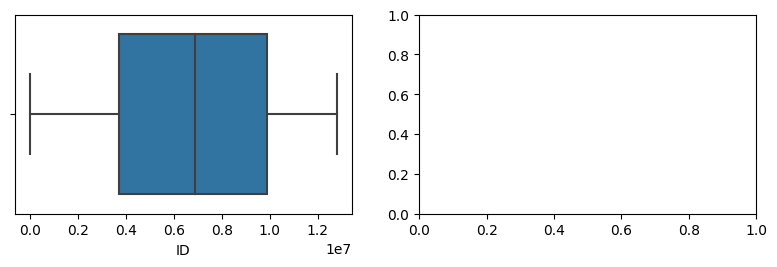

In [25]:
"""Treating the my dataset for outliers using IQR"""
plt.figure(figsize=(20,15))
for i in range(len(data.columns)):
    plt.subplot(5,4 , i + 1)
    sns.boxplot(x = data.iloc[:, i])
    plt.xlabel(data.columns[i], size = 10)

In [ ]:
"""Being there isn't a lot of outliers there is no need treating the data for outliers
First remove the target variables then normalize the data to remove skewness """
dfx1 = data.drop(["Location_Description","Primary_Type","District"], axis=1)

In [ ]:
dfx1

In [ ]:
#Transform the data set into array
array = dfx1.values
#subset the dataset in X and Y
X = array[:,0:]
#Call the MinMaxscaler on a range of 0,1 to rescale X
df1 = MinMaxScaler(feature_range =(0, 1))
rescaledX = df1.fit_transform(X)

#tranform resX to a dataframe
df2 = pd.DataFrame(rescaledX)
df2.columns = ["Unnamed: 0","ID","Block","IUCR","Description","Arrest","Domestic","Beat","Ward","Community_Area",
               "FBI_Code","Year","Location","month","day","period"]

In [ ]:
df2.describe()

In [ ]:
"""After rescaling the variance is not big hence no need to standardise the data hence move directly to Normalization
Transform the data set into array"""
array = df2.values
#subset the dataset in X and Y
X = array[:,0:]
#Call the Normalizer
dfx2 = Normalizer().fit(X)
dfx3 = dfx2.transform(X)

In [ ]:
dfx4 = pd.DataFrame(dfx3)
dfx4.columns = ["Unnamed: 0","ID","Block","IUCR","Description","Arrest","Domestic","Beat","Ward","Community_Area",
               "FBI_Code","Year","Location","month","day","period"]

In [ ]:
dfx4.describe()

In [ ]:
plt.figure(figsize=(20,15))
for i in range(len(dfx4.columns)):
    plt.subplot(4,4 , i + 1)
    sns.boxplot(x = dfx4.iloc[:, i])
    plt.xlabel(data.columns[i], size = 10)
    """Most of the outliers are due to rescaling of the data"""

In [ ]:
#checking on skewness in my data after normalization....I can conclude that the datasets are relatively normal
print(dfx4['Unnamed: 0'].skew())
print(dfx4['ID'].skew())
print(dfx4['Block'].skew())
print(dfx4['IUCR'].skew())
print(dfx4['Description'].skew())
print(dfx4['Arrest'].skew())
print(dfx4['Domestic'].skew())
print(dfx4['Beat'].skew())
print(dfx4['Ward'].skew())
print(dfx4['Community_Area'].skew())
print(dfx4['FBI_Code'].skew())
print(dfx4['Year'].skew())
print(dfx4['Location'].skew())
print(dfx4['month'].skew())
print(dfx4['day'].skew())
print(dfx4['period'].skew())

dfx4.describe()

In [ ]:
#checking for correlation among X-feature and dropping those with a correlation of 0.9 - 1
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(dfx4.corr(), annot = True)

In [ ]:
"""ID and Year have a good correlation hence no need of having both when building my model """
dfx4.drop("ID", axis=1, inplace=True)

In [ ]:
"""Feature selection , adding the target varible to be tested first"""
dfx4["Location_Description"] = data["Location_Description"]
#dfx4["Primary_Type"] = data["Primary_Type"]
#dfx4["District"] = data["District"]
dfx4.dropna(subset=["Location_Description"], axis=0, how='any', inplace=True)

In [ ]:
dfx4.head()

In [ ]:
len(dfx4.columns)

In [ ]:
dfx4.isna().sum()

In [ ]:
dfx4.shape

In [ ]:
print(dfx4['Location_Description'].unique())

In [ ]:
array = dfx4.values # Converting input data to arrays and splitting it into X and Y
X = array[:,0:15]
Y = array [:,15]

#Splitting the dataset for training and testing using K-fold cross validation
num_folds = 10
kfold = KFold(n_splits=num_folds)
#invoking the model constructor using various algorithms in this case LogisticRegression
model = LogisticRegression()
#model is training
results = cross_val_score(model, X, Y, cv=kfold)
#scoring the model to see its performance
score = np.mean(results)
print(np.mean(results))

In [ ]:
"""Conducting feature selection with Location description being my target variable"""
#conducting feature selection 

Arr  = (dfx4).values
X = Arr[:,0:15]
Y = Arr[:,15]
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X,Y)
print("Num features: {}" .format(fit.n_features_))
print("selected features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))